### Horner Plot 
#### Bottom Hole Temperature Estimation

The test data for the plot is taken from: Ryder Malcolm - "The Geological Interpretation of Well Logs" and reffered to: Fertl and Wichman, 1977. I found the same example in "Petrophysics MSc Course Notes" (Chapter 8) by Paul Glover.
Basically Horner Plot consists of a semilogarithmic graph of so called Horner Times vs max Temperatures recorded on different logging runs.

The input data consists in:
 - few strings: <i>depth</i>, <i>degrees</i>; (not important, used just for graph title and labels) 
 - two lists <i>runNo</i> and <i>runType</i>; (same as above)
 - <i>circulation_time</i> - a variable that stores how many hours last circulation;
 - <i>times</i> - a list storing the total time since circulation of the drilling mud in well was stopped at the moment of each run (also in hours);
 - <i>temp</i> - a list o temperatures coresponding to Run1, 2 and 3.

In [1]:
depth = '3200 M.'
degrees='C'
runNo = ('Run1','Run2','Run3')
runType = ('IEL','CN-CDL','AL')
circulation_time = 6           # T
times = (7.0,11.5,19.5)        # dt - total_time_since_circulation_stopped at ...th RUN
temp=(100,105,108)             #temperatures recorded at 1st, 2nd, 3rd RUN

#### Definition of horner_time, horner_bht and horner_plot functions

- <i>horner_time</i> - calculates the dt / (dt + t) ratio
- <i>horner_bht_temp</i> - calculates the BHT temperature (as being the main porpose)
- <i>horner_plot</i> - plots the graphical solution in order to identify BHT temperatures 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def horner_time(circulation_time, times, temp):
    horner_time = np.array(times) / (circulation_time + np.array(times))
    return horner_time

def horner_bht_temp (circulation_time, times, temp):
    horner_time = np.array(times) / (circulation_time + np.array(times))
    slope,intercept = np.polyfit (np.log(horner_time), temp, 1)
    bht_temp=round(slope*np.log(1) +intercept,2)
    return bht_temp

def horner_plot():
    slope,intercept = np.polyfit(np.log(horner_time), temp,1)
    x_plot = np.linspace(0.3,1,10)
    y_plot = slope*np.log(x_plot) +intercept

    # Construct the plot
    fig = plt.figure(figsize=(10,8))
    plt.title('Horner Plot\nDepth: ' + depth, y=1.02, fontsize=16)
    plt.semilogx (horner_time, temp ,'o', markersize=10,color='black')
    plt.semilogx (x_plot, y_plot,'--',color='darkgray',label = 'regression line\n through temperature points')
    for i,j,k,l in zip(horner_time, temp, runNo, runType):
        plt.annotate(str(k)+'-'+str(l)+': '+str(j)+'$^0$'+degrees, xy=(i,j), xytext=(-150,0),textcoords='offset points',
                     arrowprops=dict(arrowstyle='-|>,head_length=0.5,head_width=0.3',color='red'))
    plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
    plt.gca().xaxis.set_minor_formatter(ticker.FormatStrFormatter("%.1f"))
    plt.xlabel('Horner Time  dt / (dt + T)', color='red', fontsize=14)
    plt.ylabel('Temperature[$^0$'+degrees+']', color='red', fontsize=14)
    plt.xlim(0.3,1)
    plt.grid(True, which='both')
    plt.annotate('Estimated Formation Temperature: '+str(bht_temp)+ '$^0$' + degrees, xy=(1,bht_temp), xytext=(0.45,0.075),
                 textcoords='axes fraction', bbox=dict(boxstyle='round', facecolor='yellow'),
                 arrowprops=dict(arrowstyle='-|>',connectionstyle='angle,rad=5', color='black',relpos=(0.85,1)), fontsize=13)
    plt.annotate('@PetroGG',xy=(1,bht_temp), xytext=(10,10),textcoords='axes points', fontsize=10, color='gray')
    plt.legend(loc='upper left', fontsize=11)
    plt.savefig('hornerplot.png', type='png', dpi=200)
    plt.show()


Final step, run each function in the order that were defined (because the plot will depend on the previous two):

In [3]:
horner_time=horner_time(circulation_time, times, temp)
print ('Horner_times_list [hours] = ', horner_time)

Horner_times_list [hours] =  [ 0.53846154  0.65714286  0.76470588]


In [4]:
bht_temp=horner_bht_temp (circulation_time, times, temp)
print ('Bottom hole temperature at depth',depth,'=', bht_temp, degrees)

Bottom hole temperature at depth 3200 M. = 114.32 C


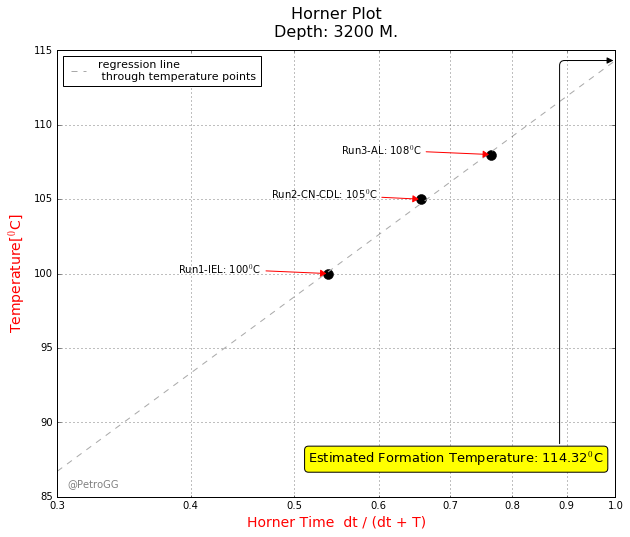

In [5]:
%matplotlib inline
horner_plot()